In [26]:
import os
from os import listdir
from os.path import abspath, isfile, join
import numpy as np
import re
from sklearn.datasets import load_files
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import pickle
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Valentina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Valentina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
page_data = load_files(os.path.abspath('privacy_policies'))
#0 -> legit, 1 -> rogue
x,y = page_data.data, page_data.target

In [20]:
## Word us is turning into u
stemmer = WordNetLemmatizer()

legit_string = ''
rogue_string = ''

legit_length = []
rogue_length = []

stop_words = stopwords.words('english')

for i in range(len(x)):
    
    # Remove all break line characters
    document = str(x[i], 'mac_roman')

    # Remove all the special characters
    document = re.sub(r'\W', ' ', document)
    
    # Remove all single characters 
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove all numbers
    document = re.sub(r'\d+', '', document)
   
    # Substitute multiple spaces with a single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Convert document to lowercase
    document = document.lower()
    
    # Lemmatization and stop words removal
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = [word for word in document if word not in stop_words]
    
    document = ' '.join(document)
    
    # Remove all single characters (removes remaining u after lemmatization of word us)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    
    if y[i]==0:
        legit_string += (document+' ')
        legit_length.append(len(document))
    elif y[i]==1:
        rogue_string += (document+' ')
        rogue_length.append(len(document))
        
    
print(legit_string)
print(legit_length)
print('------------------------------')
print(rogue_string)
print(rogue_length)

online privacy statement prudential respect privacy committed protecting provide online privacy statement tell may collect use share retain information choice visit website receive reply email electronic communication view click ad prudential online content interact social medium website application maintained party website covered privacy statement privacy statement applies prudential website online communication contain link statement doe apply website communication privacy statement website company entity linked website learn privacy policy another website please refer privacy statement website using website agree term condition privacy statement website controlled operated prudential united state intended resident united state intended subject law jurisdiction state country territory united state visting outside united state may necessarily consistent law regulation home country kind information collect browse website without providing personal information however choose take advan

information 5539
may 2492
personal 2210
service 2094
use 1889
data 1628
privacy 1592
website 1314
site 1301
policy 1044
          word  frequency
0  information       5539
1          may       2492
2     personal       2210
3      service       2094
4          use       1889
5         data       1628
6      privacy       1592
7      website       1314
8         site       1301
9       policy       1044


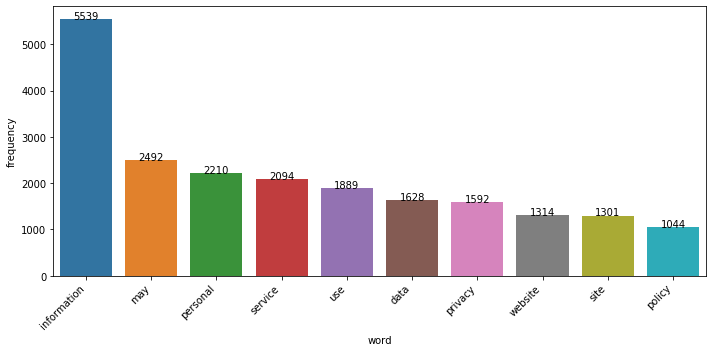

In [47]:
# Top 10 legit words

data_legit = {}
data_legit['word'] = []
data_legit['frequency'] = []

legit_split = legit_string.split()
legit_freq = nltk.FreqDist(legit_split)
for word, frequency in legit_freq.most_common(10):
    
    data_legit['word'].append(word)
    data_legit['frequency'].append(frequency)
    print(word, frequency)
    
plt.figure(figsize=(10,5))
df_1 = pd.DataFrame(data_legit)
print(df_1)

g = sns.barplot(x='word',y='frequency',data=df_1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

for index, row in df_1.iterrows():
    g.text(row.name,row.frequency,row.frequency, color='black', ha="center")

plt.tight_layout()
plt.savefig('images/legit_1_tc.png')

information 5539
may 2492
personal 2210
service 2094
use 1889
data 1628
privacy 1592
website 1314
site 1301
policy 1044
          word  frequency
0  information       5539
1          may       2492
2     personal       2210
3      service       2094
4          use       1889
5         data       1628
6      privacy       1592
7      website       1314
8         site       1301
9       policy       1044


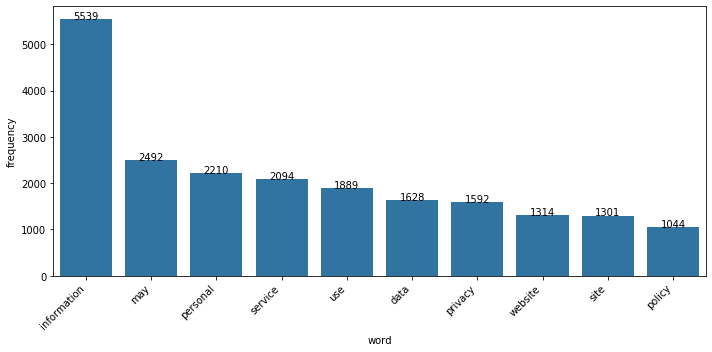

In [48]:
# Top 10 legit words

data_legit = {}
data_legit['word'] = []
data_legit['frequency'] = []

legit_split = legit_string.split()
legit_freq = nltk.FreqDist(legit_split)
for word, frequency in legit_freq.most_common(10):
    
    data_legit['word'].append(word)
    data_legit['frequency'].append(frequency)
    print(word, frequency)
    
plt.figure(figsize=(10,5))
df_1 = pd.DataFrame(data_legit)
print(df_1)

g = sns.barplot(x='word',y='frequency',data=df_1, color='#1f78b4')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

for index, row in df_1.iterrows():
    g.text(row.name,row.frequency,row.frequency, color='black', ha="center")
    
plt.tight_layout()    
plt.savefig('images/legit_2_tc.png')

In [22]:
# Top 10 rogue words
rogue_split = rogue_string.split()
rogue_freq = nltk.FreqDist(rogue_split)
for word, frequency in rogue_freq.most_common(10):
    print(word, frequency)

information 3010
may 1230
service 1128
site 1095
use 997
privacy 867
policy 675
party 672
third 582
personal 509


information 3010
may 1230
service 1128
site 1095
use 997
privacy 867
policy 675
party 672
third 582
personal 509
          word  frequency
0  information       3010
1          may       1230
2      service       1128
3         site       1095
4          use        997
5      privacy        867
6       policy        675
7        party        672
8        third        582
9     personal        509


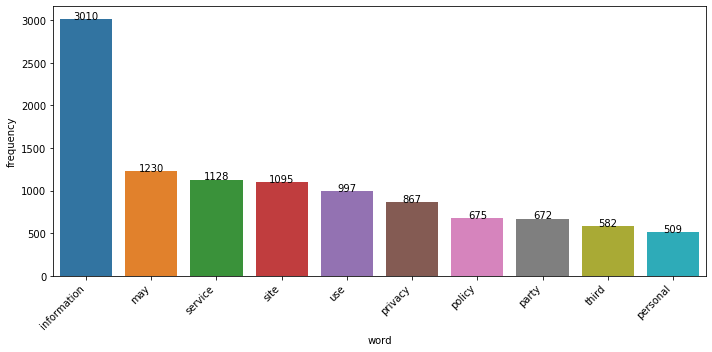

In [52]:
# Top 10 rogue words

data_rogue = {}
data_rogue['word'] = []
data_rogue['frequency'] = []

rogue_split = rogue_string.split()
rogue_freq = nltk.FreqDist(rogue_split)
for word, frequency in rogue_freq.most_common(10):
    
    data_rogue['word'].append(word)
    data_rogue['frequency'].append(frequency)
    print(word, frequency)
    
plt.figure(figsize=(10,5))
df_2 = pd.DataFrame(data_rogue)
print(df_2)

g = sns.barplot(x='word',y='frequency',data=df_2)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

for index, row in df_2.iterrows():
    g.text(row.name,row.frequency,row.frequency, color='black', ha="center")
    
plt.tight_layout()    
plt.savefig('images/rogue_1_tc.png')

information 3010
may 1230
service 1128
site 1095
use 997
privacy 867
policy 675
party 672
third 582
personal 509
          word  frequency
0  information       3010
1          may       1230
2      service       1128
3         site       1095
4          use        997
5      privacy        867
6       policy        675
7        party        672
8        third        582
9     personal        509


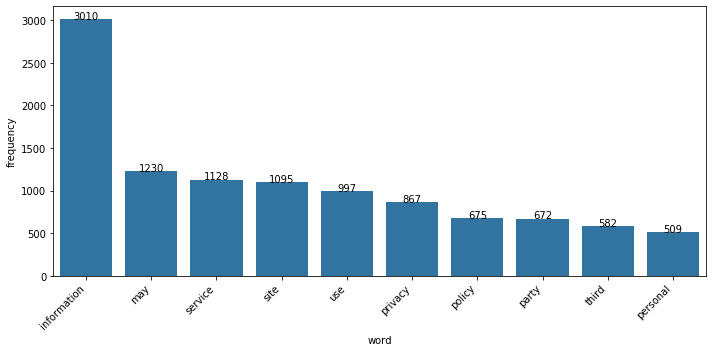

In [51]:
# Top 10 rogue words

data_rogue = {}
data_rogue['word'] = []
data_rogue['frequency'] = []

rogue_split = rogue_string.split()
rogue_freq = nltk.FreqDist(rogue_split)
for word, frequency in rogue_freq.most_common(10):
    
    data_rogue['word'].append(word)
    data_rogue['frequency'].append(frequency)
    print(word, frequency)
    
plt.figure(figsize=(10,5))
df_2 = pd.DataFrame(data_rogue)
print(df_2)

g = sns.barplot(x='word',y='frequency',data=df_2, color='#1f78b4')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

for index, row in df_2.iterrows():
    g.text(row.name,row.frequency,row.frequency, color='black', ha="center")
    
plt.tight_layout()    
plt.savefig('images/rogue_2_tc.png')

In [ ]:
#TODO: should the characteristics include the entire dataset or should we exclude Go Daddy